Sheet for data exploration. Import cleaned data csv and explore the dataset for insight, outliers, 

In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("kc_housing_data_cleaned.csv")
df.describe().round(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Compounding,Discounting,price_dec_15,price_dec_19
count,2.142000e+04,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0,...,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0,21420.0
mean,4.580940e+09,541861.4,3.4,2.1,2083.1,15128.0,1.5,0.0,0.2,3.4,...,1973.0,98077.9,47.6,-122.2,1988.4,12775.7,1.1,0.9,589077.1,737423.5
std,2.876761e+09,367556.9,0.9,0.8,918.8,41530.8,0.5,0.1,0.8,0.7,...,29.0,53.5,0.1,0.1,685.5,27345.6,0.0,0.0,399712.7,500211.2
min,1.000102e+06,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,...,1900.0,98001.0,47.2,-122.5,399.0,651.0,1.0,0.9,85267.2,106150.8
25%,2.123537e+09,324950.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,...,1954.0,98033.0,47.5,-122.3,1490.0,5100.0,1.1,0.9,351404.6,442227.0
50%,3.904921e+09,450550.0,3.0,2.2,1920.0,7614.0,1.5,0.0,0.0,3.0,...,1977.0,98065.0,47.6,-122.2,1840.0,7620.0,1.1,0.9,492829.7,613157.1
75%,7.308900e+09,645000.0,4.0,2.5,2550.0,10690.5,2.0,0.0,0.0,4.0,...,1999.0,98117.0,47.7,-122.1,2370.0,10086.2,1.1,0.9,700415.4,877785.6
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,...,2015.0,98199.0,47.8,-121.3,6210.0,871200.0,1.1,1.0,8464718.0,10478991.1


In [58]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_key,Compounding,Discounting,price_dec_15,price_dec_19
0,5056500260,5/2/2014,440000.0,4,2.25,2160,8119,1.0,0.0,0.0,...,98006,47.5443,-122.177,1850,9000,2014-05-02,1.109072,0.901654,487991.86,598799.49
1,4040800810,5/2/2014,420000.0,3,2.25,2000,8030,1.0,0.0,0.0,...,98008,47.6188,-122.114,2070,8250,2014-05-02,1.109072,0.901654,465810.41,571581.33


Data exploration starts from this point onwards:

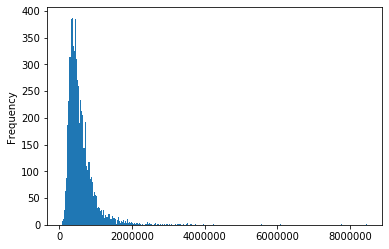

In [59]:
price = df['price_dec_15']
price.plot.hist(alpha = 1, bins = 1000)

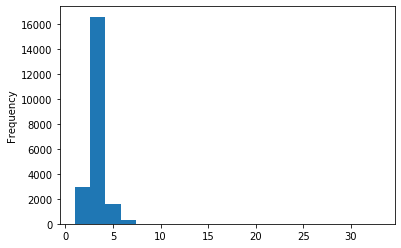

In [60]:
bedrooms = df['bedrooms']
bedrooms.plot.hist(alpha = 1, bins = 20)

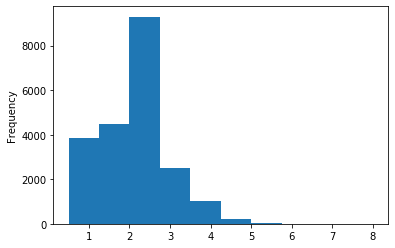

In [61]:
bedrooms = df['bathrooms']
bedrooms.plot.hist(alpha = 1, bins = 10)

In [62]:
def get_histogram(column, no_bins):
    histogram = df[column]
    histogram.plot.hist(alpha = 1, bins = no_bins)

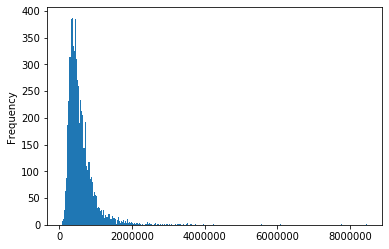

In [63]:
get_histogram('price_dec_15',1000)

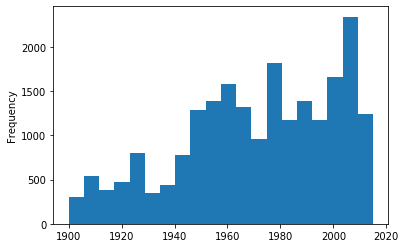

In [64]:
get_histogram('yr_built',20)

In [65]:
bathrooms = df['bathrooms'].unique()

In [66]:
hist(df['bathrooms'])

<Figure size 1368x1080 with 0 Axes>

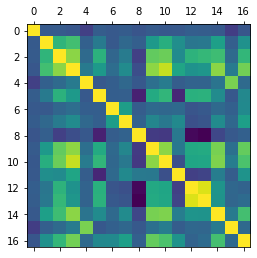

In [69]:
# for the correlation matrix remove 'price' & remove 'price_dec_19'

df1 = df
del df1['price']
del df1['price_dec_19']
del df1['Compounding']
del df1['Discounting']
del df1['lat']
del df1['long']
del df1['zipcode']

import matplotlib.pyplot as plt
plt.figure(figsize=(19, 15))
plt.matshow(df1.corr())
plt.show()

In [70]:
import pandas as pd
import numpy as np

corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price_dec_15
id,1,0.00069,0.0043,-0.013,-0.13,0.018,-0.0036,0.011,-0.024,0.0065,-0.012,-0.0049,0.021,0.019,-0.0039,-0.14,-0.019
bedrooms,0.00069,1,0.52,0.58,0.032,0.18,-0.0022,0.078,0.026,0.36,0.48,0.3,0.16,0.16,0.39,0.031,0.31
bathrooms,0.0043,0.52,1,0.76,0.088,0.5,0.064,0.18,-0.13,0.67,0.69,0.28,0.51,0.53,0.57,0.088,0.53
sqft_living,-0.013,0.58,0.76,1,0.17,0.35,0.1,0.28,-0.062,0.76,0.88,0.43,0.32,0.34,0.76,0.18,0.7
sqft_lot,-0.13,0.032,0.088,0.17,1,-0.0056,0.021,0.075,-0.0092,0.11,0.18,0.015,0.052,0.051,0.14,0.72,0.089
floors,0.018,0.18,0.5,0.35,-0.0056,1,0.021,0.027,-0.27,0.46,0.52,-0.24,0.49,0.5,0.28,-0.011,0.26
waterfront,-0.0036,-0.0022,0.064,0.1,0.021,0.021,1,0.38,0.017,0.083,0.072,0.083,-0.025,-0.0072,0.084,0.031,0.27
view,0.011,0.078,0.18,0.28,0.075,0.027,0.38,1,0.045,0.25,0.17,0.27,-0.056,-0.028,0.28,0.073,0.39
condition,-0.024,0.026,-0.13,-0.062,-0.0092,-0.27,0.017,0.045,1,-0.15,-0.16,0.17,-0.37,-0.39,-0.095,-0.0034,0.036
grade,0.0065,0.36,0.67,0.76,0.11,0.46,0.083,0.25,-0.15,1,0.76,0.16,0.45,0.46,0.71,0.12,0.67


In [37]:
df.head(2)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_key,price_dec_15
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,1955.0,1340,5650,2014-10-13,243937.78
1,4036801170,10/13/2014,4,1.75,1760,7300,1.0,0.0,0.0,3,7,880,880.0,1956,1956.0,1680,7500,2014-10-13,417739.33


In [41]:
dupes = df[df['id'].duplicated() == True]
len(dupes)

177

Calculate the distance to the centre downtown area, using differences in long and lat and trigonometry

In [88]:
import math

def distance_function(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))/(1000*1.60934)  #Convert code from meters to miles

https://janakiev.com/blog/gps-points-distance-python/

In [89]:
seattle_downtown = 47.605,  -122.3344
houses = {
    'house 1': (47.5112,  -122.257),
    'house 2': (47.721,  -122.319),
    
    }

for house, coord in houses.items():
    distance = distance_function(seattle_downtown, coord)
    
    
    print(house, distance)

house 1 7.420144604386407
house 2 8.04909224580169


Alternative Measure

Miles per Logitude & Latitude Calculator
http://www.csgnetwork.com/degreelenllavcalc.html

In [84]:
print('Latitude is :' + str(df.iloc[1][17]))
print('Londitude is :' + str(df.iloc[1][18]))

Latitude is :2014-05-02
Londitude is :465810.41
